In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 28 ##

In [3]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


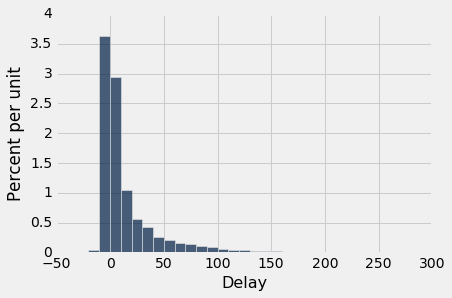

In [4]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [5]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [6]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means = make_array()

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size)
        sample_mean = np.mean(sampled_flights.column('Delay'))
        means = np.append(means, sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print('Repetitions :', repetitions)
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Repetitions : 10000
Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.653542
Population SD: 39.4801998516
SD of sample means: 1.32517783523


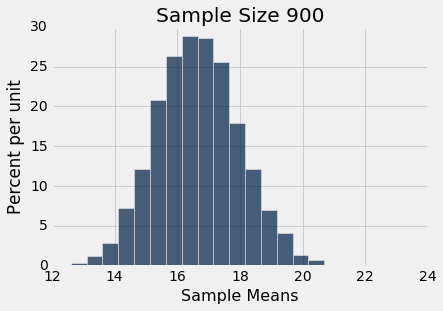

In [7]:
sample_means(900)

In [9]:
population_sd = np.std(delays)
population_sd

39.480199851609314

In [10]:
population_sd/np.sqrt(900)

1.3160066617203106

## SD of 0/1 Population ##

In [17]:
# Population of size 10

ones = 5
zero_one_population = np.append(np.ones(ones), np.zeros(10 - ones))
zero_one_population

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [18]:
np.std(zero_one_population)

0.5

In [19]:
pop_proportions = make_array()
pop_SDs = make_array()

for k in np.arange(1, 10):
    population = np.append(np.ones(k), np.zeros(10 - k))
    population_SD = np.std(population)
    pop_SDs = np.append(pop_SDs, population_SD)
    pop_proportions = np.append(pop_proportions, k/10)
    
sd_table = Table().with_columns(
    'Population Proportion', pop_proportions,
    'Population SD', pop_SDs
)

sd_table

Population Proportion,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


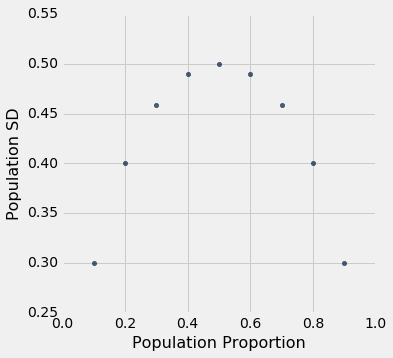

In [20]:
sd_table.scatter(0)